In [26]:
# csvを読み込む
import pandas as pd

input_file = '/home/eevee/social-lstm/thor-magni/tm_png/Scenario_1/val/Magni_170522_SC1B_R2.csv'
output_file = '/home/eevee/social-lstm/thor-magni/tm_png/Scenario_1/test/20241016_Magni_170522_SC1B_R2.csv'

# CSVファイルをデータフレームとして読み込む
df = pd.read_csv(input_file)

# ag_idを浮動小数点数に変換
df['ag_id'] = df['ag_id'].astype(float)

# 読み込んだデータを確認
print(df.head())  # データの最初の5行を表示


   frame_id  ag_id         x         y         z  G3D_X  G3D_Y  G3D_Z
0         1    1.0   499.534  3193.042  1854.063    NaN    NaN    NaN
1         1    2.0 -6017.259  2578.254  1947.570    NaN    NaN    NaN
2         1    6.0       NaN       NaN       NaN    NaN    NaN    NaN
3         1    7.0 -6344.940  1748.107  1761.228    NaN    NaN    NaN
4         1    3.0  8613.359  -378.955  1747.595    NaN    NaN    NaN


In [27]:
# ag_idでframe_idごとにソート
df = df.sort_values(['ag_id', 'frame_id'])


print(df.head())
print(df.tail())

    frame_id  ag_id          x         y         z  G3D_X  G3D_Y  G3D_Z
6          1    0.0 -3869.6970 -1181.842  309.2680    NaN    NaN    NaN
12         2    0.0 -3869.4425 -1181.731  309.1245    NaN    NaN    NaN
18         3    0.0 -3869.1950 -1181.601  308.9985    NaN    NaN    NaN
26         4    0.0 -3869.1310 -1181.634  309.0010    NaN    NaN    NaN
38         5    0.0 -3869.0765 -1181.625  308.9930    NaN    NaN    NaN
      frame_id  ag_id          x         y          z  G3D_X  G3D_Y  G3D_Z
4764       596    7.0  3097.5795  315.1425  1748.2810    NaN    NaN    NaN
4775       597    7.0  3627.7020  277.3670  1759.9680    NaN    NaN    NaN
4778       598    7.0  4139.0820  267.6655  1749.7425    NaN    NaN    NaN
4786       599    7.0  4641.5025  291.2795  1738.9860    NaN    NaN    NaN
4794       600    7.0  4933.8860  302.9585  1734.3235    NaN    NaN    NaN


    frame_id  ag_id          x         y         z  G3D_X  G3D_Y  G3D_Z
6          1    0.0 -3869.6970 -1181.842  309.2680    0.0    0.0    0.0
12         2    0.0 -3869.4425 -1181.731  309.1245    0.0    0.0    0.0
18         3    0.0 -3869.1950 -1181.601  308.9985    0.0    0.0    0.0
26         4    0.0 -3869.1310 -1181.634  309.0010    0.0    0.0    0.0
38         5    0.0 -3869.0765 -1181.625  308.9930    0.0    0.0    0.0
      frame_id  ag_id          x         y          z  G3D_X  G3D_Y  G3D_Z
4764       596    7.0  3097.5795  315.1425  1748.2810    0.0    0.0    0.0
4775       597    7.0  3627.7020  277.3670  1759.9680    0.0    0.0    0.0
4778       598    7.0  4139.0820  267.6655  1749.7425    0.0    0.0    0.0
4786       599    7.0  4641.5025  291.2795  1738.9860    0.0    0.0    0.0
4794       600    7.0  4933.8860  302.9585  1734.3235    0.0    0.0    0.0


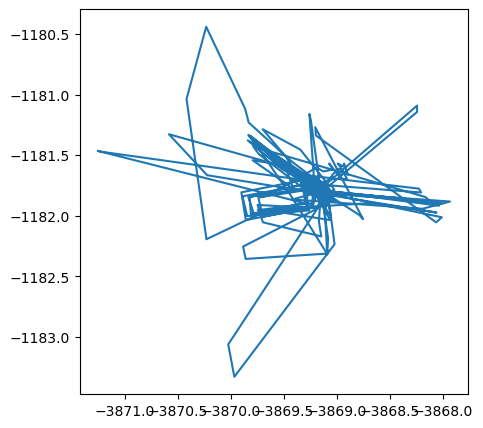

In [28]:
# `G3D_X`, `G3D_Y`, `G3D_Z`が存在しない場合は、0で埋める
df['G3D_X'] = df['G3D_X'].fillna(0)
df['G3D_Y'] = df['G3D_Y'].fillna(0)
df['G3D_Z'] = df['G3D_Z'].fillna(0)

# 補間処理を行う関数を定義
def interpolate_group(df_group):
    df_group['G3D_X'] = df_group['G3D_X'].interpolate(method='linear', limit_direction='both')
    df_group['G3D_Y'] = df_group['G3D_Y'].interpolate(method='linear', limit_direction='both')
    df_group['G3D_Z'] = df_group['G3D_Z'].interpolate(method='linear', limit_direction='both')
    # `x`, `y`, `z`の補間
    df_group['x'] = df_group['x'].interpolate(method='linear', limit_direction='both')
    df_group['y'] = df_group['y'].interpolate(method='linear', limit_direction='both')
    df_group['z'] = df_group['z'].interpolate(method='linear', limit_direction='both')
    return df_group



# ag_idごとにグループ化し、補間を適用
df_interpolated = df.groupby('ag_id').apply(interpolate_group)

df['x'] = df['x'].fillna(0)
df['y'] = df['y'].fillna(0)
df['z'] = df['z'].fillna(0)

# 補間後のデータを確認
print(df_interpolated.head())
print(df_interpolated.tail())

# 特定のag_id可視化
import matplotlib.pyplot as plt

idx = 0
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(df_interpolated[df_interpolated['ag_id'] == idx]['x'], df_interpolated[df_interpolated['ag_id'] == idx]['y'], label='ag_id=1')

# # csvとして保存
# output_file = '/home/eevee/social-lstm/thor-magni/tm_png/Scenario_1/train/20241014_Magni_120522_SC1A_R1.csv'
# df_interpolated.to_csv(output_file, index=False)
# print('Saved to', output_file)

In [29]:
# すべての行に対して、frame_idが20ごとにag_idに10を足していく
df_interpolated['modified_ag_id'] = df_interpolated['ag_id'] + ((df_interpolated['frame_id']-1) // 20) * 10

# 列の順序を指定した順に並べ替える
columns_order = ['frame_id', 'modified_ag_id', 'ag_id', 'x', 'y', 'z', 'G3D_X', 'G3D_Y', 'G3D_Z']
df_interpolated = df_interpolated[columns_order]
df_interpolated = df_interpolated.sort_values(['modified_ag_id', 'frame_id'])

print(df_interpolated.head())

# csvとして保存
df_interpolated.to_csv(output_file, index=False)
print('Saved to', output_file)

    frame_id  modified_ag_id  ag_id          x         y         z  G3D_X  \
6          1             0.0    0.0 -3869.6970 -1181.842  309.2680    0.0   
12         2             0.0    0.0 -3869.4425 -1181.731  309.1245    0.0   
18         3             0.0    0.0 -3869.1950 -1181.601  308.9985    0.0   
26         4             0.0    0.0 -3869.1310 -1181.634  309.0010    0.0   
38         5             0.0    0.0 -3869.0765 -1181.625  308.9930    0.0   

    G3D_Y  G3D_Z  
6     0.0    0.0  
12    0.0    0.0  
18    0.0    0.0  
26    0.0    0.0  
38    0.0    0.0  
Saved to /home/eevee/social-lstm/thor-magni/tm_png/Scenario_1/test/20241016_Magni_180522_SC1B_R1.csv
